### Distinguishing Lionel Messi from his almost identical Lookalike using fastai library with only 60 trainig images and getting 92.5% accuracy.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

I scraped Leo Messy's [official instagram page](https://www.instagram.com/leomessi/) and Reza Parastesh's [official instagram page](https://www.instagram.com/rezaparastesh/).

From each of them I extracted 50 photos, adding 30 to train folder and 20 to valid folder.

The data is available at this [URL](https://www.dropbox.com/s/qwtr64qkcsij855/Messy-Parastesh.zip).

I failed to use fastai's `untar_data` or `download_data`, so, I ended up manually adding the data at the desired place

In [4]:
path = Path('/home/jupyter/.fastai/data/Messy-Parastesh')

In [5]:
path

PosixPath('/home/jupyter/.fastai/data/Messy-Parastesh')

In [6]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs)

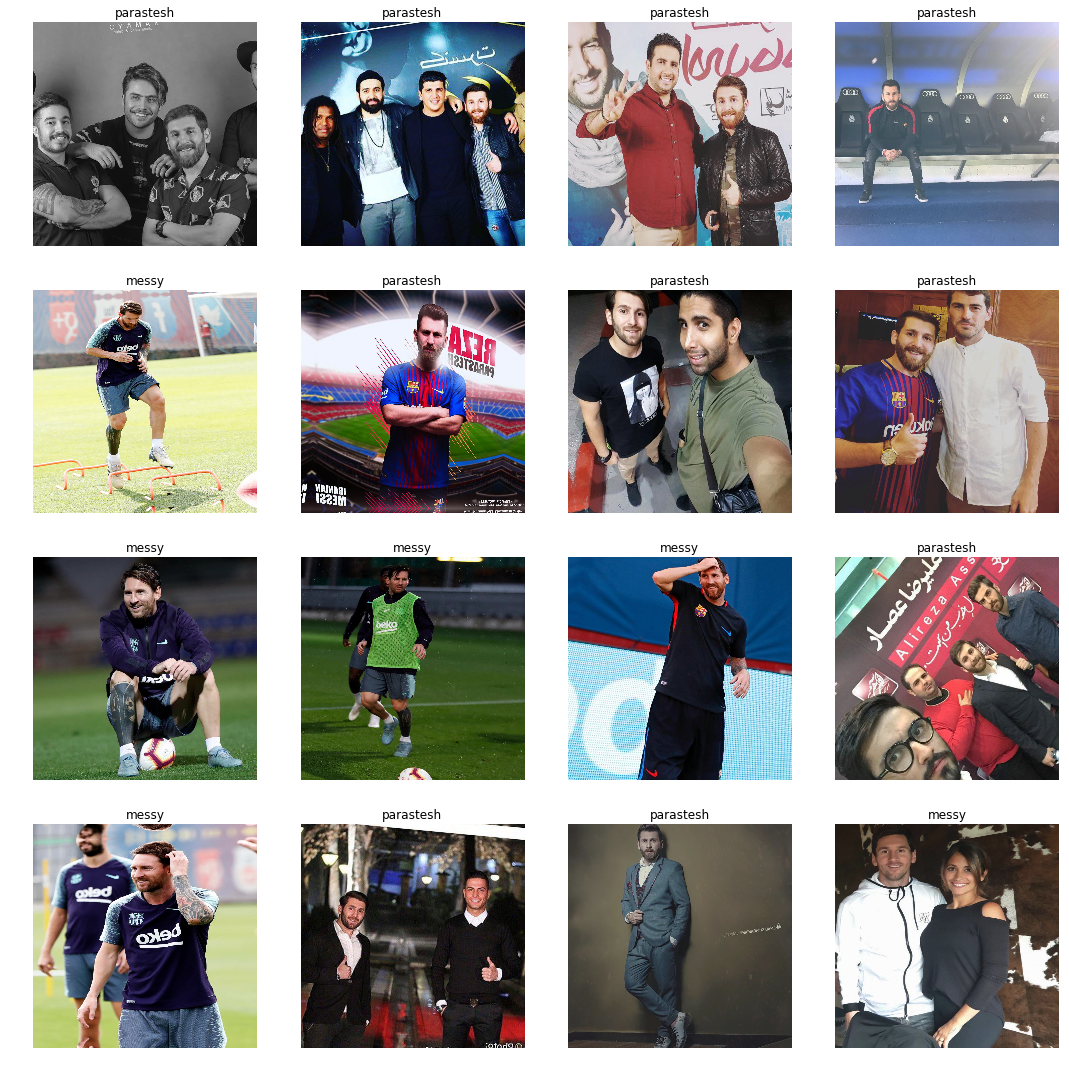

In [7]:
data.show_batch(rows=4, figsize=(15,15))

In [8]:
print(data.classes)
len(data.classes),data.c

['messy', 'parastesh']


(2, 2)

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(10)

Total time: 00:40
epoch  train_loss  valid_loss  error_rate
1      1.016637    0.855953    0.600000    (00:05)
2      1.071323    0.680066    0.500000    (00:04)
3      0.957029    0.507452    0.275000    (00:03)
4      0.851187    0.408537    0.200000    (00:03)
5      0.747257    0.378112    0.225000    (00:03)
6      0.655891    0.379486    0.250000    (00:04)
7      0.583914    0.392343    0.225000    (00:03)
8      0.527881    0.403440    0.225000    (00:04)
9      0.481332    0.409679    0.225000    (00:03)
10     0.438062    0.413483    0.200000    (00:04)



In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


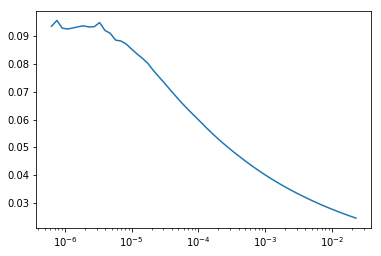

In [14]:
learn.recorder.plot()

In [15]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-2))

Total time: 00:42
epoch  train_loss  valid_loss  error_rate
1      0.084531    0.413340    0.200000    (00:04)
2      0.109393    0.381777    0.175000    (00:04)
3      0.083515    0.603545    0.250000    (00:04)
4      0.068997    0.680982    0.150000    (00:04)
5      0.056174    0.854860    0.150000    (00:04)
6      0.047239    0.936111    0.125000    (00:04)
7      0.040277    0.974047    0.125000    (00:04)
8      0.035663    1.007919    0.125000    (00:03)
9      0.031972    0.997688    0.125000    (00:04)
10     0.030140    0.971160    0.100000    (00:04)



In [16]:
learn.save('stage-2')

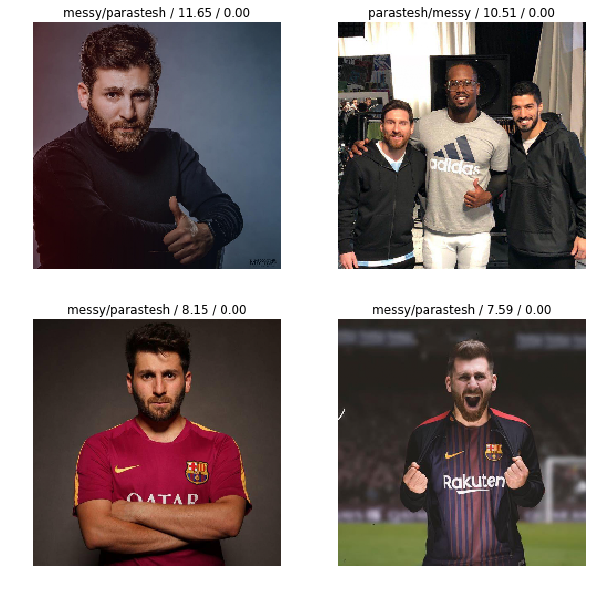

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,10))